In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [118]:
df = pd.read_csv('./work/viikko7/datasets/titanic-class-age-gender-survived.csv')

#X = df[['Age', 'Gender']] # tehtävä 2
X = df[['PClass', 'Age', 'Gender']] # tehtävä 3
y = df['Survived'] # selvitettävä muuttuja

In [119]:
# dummies
X_org = X

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['PClass', 'Gender'])], remainder='passthrough')

X = ct.fit_transform(X)

In [120]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [121]:
# Scaling
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [122]:
# Fitting Logistic Regression to the Training set
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred_pros = model.predict_proba(X_test) # probability estimates

[[162   9]
 [ 34  58]]


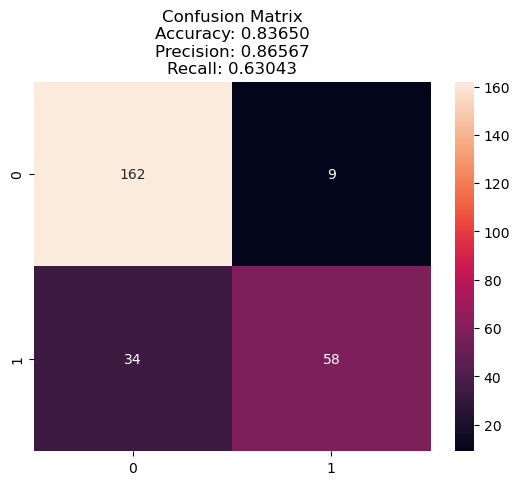

True Negative: 162
False Positive: 9
False Negative: 34
True Positive: 58


In [124]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
# Precision
pc = precision_score(y_test, y_pred)
# Recall
rc = recall_score(y_test, y_pred)

# Visualizing the Confusion Matrix
tn, fp, fn, tp = cm.ravel()
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
ax.set_title(f'Confusion Matrix\nAccuracy: {acc:.5f}\nPrecision: {pc:.5f}\nRecall: {rc:.5f}')
plt.show()


In [125]:
# Predicting new data
Xnew = pd.read_csv('./work/viikko7/datasets/titanic-new.csv')
Xnew_org = Xnew
Xnew = ct.transform(Xnew)
Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)
ynew_pros = model.predict_proba(Xnew)

for i in range(len(Xnew_org)):
    print(f'[{Xnew_org.iloc[i, 0]}, {Xnew_org.iloc[i, 1]}, {Xnew_org.iloc[i, 2]}] Survived prediction: {ynew[i]}')

[1st, 17.0, female] Survived prediction: 1
[3rd, 17.0, male] Survived prediction: 0
